# Natural Language Processing
## Fake News Detection 

In [ ]:
pip install ftfy

     |████████████████████████████████| 71kB 3.1MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=f2bda00b393e15dd1647b75b12ed9a68a44235ce3412f1fb2fe5265b400af332
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built ftfy


In [ ]:
# import libraries
import ftfy
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')
from sklearn import metrics
import itertools


from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier # need to import xboost calssifer

warnings.filterwarnings('ignore')
np.random.seed(0)

# Loading the Train Dataset


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#https://drive.google.com/file/d/1uvJIi0Kdeo1xqKhRNLknCEWdWtIXvgB4/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1uvJIi0Kdeo1xqKhRNLknCEWdWtIXvgB4'})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fileDownloaded.GetContentFile('train.csv')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
df_rraw= pd.read_csv('train.csv' )

df_rraw.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
# The file contains 5 columns
df_rraw.shape
df_raw=df_rraw.dropna()
print(df_raw.shape)
df_raw=df_raw.reset_index()

df_raw1 =df_raw[df_raw['label']==0].iloc[0:1300,:]
df_raw2 =df_raw[df_raw['label']==1].iloc[0:1700,:]
df_raw=pd.concat([df_raw1,df_raw2],ignore_index=True)
df_raw = df_raw.sample(frac=1).reset_index(drop=True)
df_raw.drop(['index','id','title','author'],axis='columns', inplace=True)
df_raw.shape

(18285, 5)


(3000, 2)

In [ ]:
df_raw.head(10)

,text,label
0,President Donald Trump signaled his support fo...,0
1,"Trump and Brexit Defeat Globalism, for Now Any...",1
2,"NASA is getting new looks at Jupiter, from clo...",0
3,(Before It's News)\nAs advanced as our Job Pos...,1
4,"In my timeline it was Michael Barage, Rump and...",1
5,"In the tech business, you often invent the pro...",0
6,WASHINGTON — Navy SEALs led an unsuccessful...,0
7,“Be ye therefore perfect . . . even as your Fa...,1
8,,1
9,Images reveal crashed Schiaparelli Mars lander...,1


In [ ]:
# some of the statements
df_raw['text'].head(10).tolist()

['President Donald Trump signaled his support for   activists attending the March for Life on Friday. [“The #MarchForLife is so important,” he wrote on Twitter. “To all of you marching  —   you have my full support!”  The President confirmed that Vice President Mike Pence will speak at the   event. According to organizers, Pence is speaking around noon. Trump set big expectations for the March for Life during an interview with ABC’s David Muir when asked to compare possible crowd size to that of last week’s Women’s March on Washington: “You will have a large crowd on Friday, too, which is mostly   people, too, and I didn’t realize this, but I was told. You will have a very large crowd of people —  as large or larger, Trump said. Some people said it will be larger —    people, and they say the press doesn’t cover them.',
 'Trump and Brexit Defeat Globalism, for Now Anyway   14, 2016 \nTrumpism as a stress test for democracy …. A series of populist anti-globalism shocks is a test for Wes

# Exploratory Data Analysis

Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

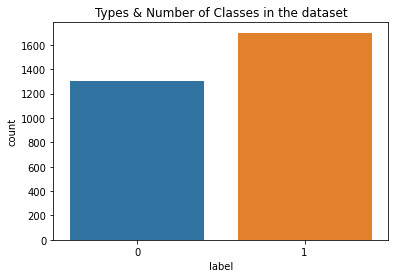

In [ ]:
sns.countplot(x='label',data=df_raw)

plt.title('Types & Number of Classes in the dataset')

In [ ]:
df_raw.head()

,text,label
0,President Donald Trump signaled his support fo...,0
1,"Trump and Brexit Defeat Globalism, for Now Any...",1
2,"NASA is getting new looks at Jupiter, from clo...",0
3,(Before It's News)\nAs advanced as our Job Pos...,1
4,"In my timeline it was Michael Barage, Rump and...",1


In [ ]:
def binary_class_dataset(data):
    
    data=data.iloc[:,[0,1]]
    data.columns = ['text','label']
    Original_labels = {
        1: 'Fake',
       
        0: 'True',
    
    }
    data['label'] = data['label'].map(Original_labels)

    return data

In [ ]:
bi_class= binary_class_dataset(df_raw)
bi_class.head(2)

,text,label
0,President Donald Trump signaled his support fo...,True
1,"Trump and Brexit Defeat Globalism, for Now Any...",Fake


## Creating Word Clouds for the text 'text' in the train dataset

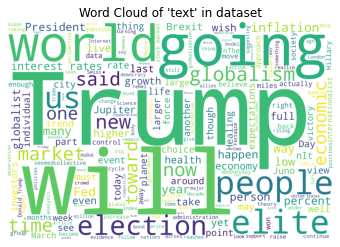

In [ ]:
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = bi_class['text'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'text' in dataset")
plt.show()

In [ ]:
# creating two dataset consisting of True and Fake statements seperately
np.random.seed(0)
true_statements_dataset = bi_class[bi_class['label']== 'True']
fake_statements_dataset = bi_class[bi_class['label']== 'Fake']

In [ ]:
np.random.seed(0)
# contains only TRUE statements
true_statements_dataset.shape

(1300, 2)

In [ ]:
# contains only FAKE statements
np.random.seed(0)
fake_statements_dataset.shape

(1700, 2)

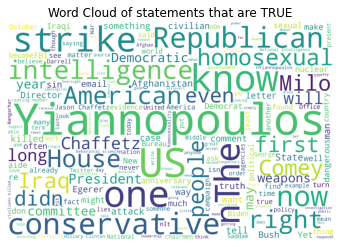

In [ ]:
np.random.seed(0)
# creating word cloud for only those statements that are TRUE
text_true = true_statements_dataset['text'].values
wordcloud_true = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_true))
plt.imshow(wordcloud_true)
plt.axis('off')
plt.title("Word Cloud of statements that are TRUE")
plt.show()

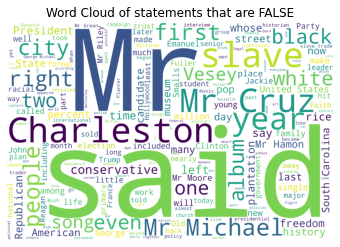

In [ ]:
np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_false = fake_statements_dataset['text'].values
wordcloud_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_false))
plt.imshow(wordcloud_false)
plt.axis('off')
plt.title("Word Cloud of statements that are FALSE")
plt.show()

# **Irony data exploration**

In [ ]:
def parse_dataset(fp):
    '''
    Loads the dataset .txt file with label-tweet on each line and parses the dataset.
    :param fp: filepath of dataset
    :return:
        corpus: list of tweet strings of each tweet.
        y: list of labels
    '''
    y = []
    corpus = []
    with open(fp, 'rt') as data_in:
        for line in data_in:
            if not line.lower().startswith("tweet index"): # discard first line if it contains metadata
                line = line.rstrip() # remove trailing whitespace
                label = int(line.split("\t")[1])
                tweet = line.split("\t")[2]
                y.append(label)
                corpus.append(tweet)

    return corpus, y

In [ ]:
path = "/content/gdrive/My Drive/collab/ironyA.txt" 
tweets, labels = parse_dataset(path)

In [ ]:
data_irony = pd.DataFrame({'text': tweets, 'label':labels})
data_irony[:10]

,text,label
0,Sweet United Nations video. Just in time for C...,1
1,@mrdahl87 We are rumored to have talked to Erv...,1
2,Hey there! Nice to see you Minnesota/ND Winter...,1
3,3 episodes left I'm dying over here,0
4,"""I can't breathe!"" was chosen as the most nota...",1
5,You're never too old for Footie Pajamas. http:...,0
6,Nothing makes me happier then getting on the h...,1
7,4:30 an opening my first beer now gonna be a l...,0
8,@Adam_Klug do you think you would support a gu...,0
9,@samcguigan544 You are not allowed to open tha...,0


In [ ]:
ironic = data_irony[data_irony['label'] == 1]
non_ironic = data_irony[data_irony['label'] == 0]

print('Ironic shape', ironic.shape)
print('Non ironic shape', non_ironic.shape)

Ironic shape (1911, 2)
Non ironic shape (1923, 2)


Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

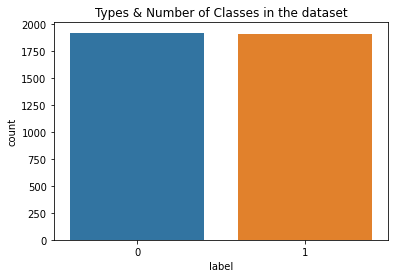

In [ ]:
sns.countplot(x='label',data=data_irony)

plt.title('Types & Number of Classes in the dataset')

In [ ]:
stop = stopwords.words('english')
def common_words(df, num=10):    
    words = ' '.join(df['text']).lower().split()
    words_cleaned = [word for word in words if word not in stop]
    return pd.Series(words_cleaned).value_counts()[:num]

In [ ]:
print('Common Ironic words')
print(common_words(ironic))


Common Ironic words
love      160
i'm       113
like       94
great      83
get        81
day        79
people     61
good       60
can't      54
one        52
dtype: int64


In [ ]:
print('Non-ironic words')
print(common_words(non_ironic))

Non-ironic words
i'm      91
get      80
&        72
like     71
-        57
one      55
would    52
think    45
love     44
new      44
dtype: int64


# **Clickbait Exploration** 

In [ ]:
path = "/content/gdrive/My Drive/collab/clickbait_data.txt" 
path2 = "/content/gdrive/My Drive/collab/non_clickbait_data.txt" 

In [ ]:
def parse_dataset():
    clickbait = []
    non_clickbait = []
    with open(path, 'rt') as data_in:
        for line in data_in:
            if line.strip():
                clickbait.append(line.strip())
                
                
    with open(path2, 'rt') as data_in:
        for line in data_in:
            if line.strip():
                non_clickbait.append(line.strip())

    return clickbait, non_clickbait

In [ ]:
clickbait, non_clickbait = parse_dataset()

In [ ]:
df_clickbait = pd.DataFrame({'text':clickbait,'label':1})
print (df_clickbait)
df_nonclickbait = pd.DataFrame({'text':non_clickbait,'label':0})
print (df_nonclickbait)

                                                    text  label
0                                     Should I Get Bings      1
1          Which TV Female Friend Group Do You Belong In      1
2      The New "Star Wars: The Force Awakens" Trailer...      1
3      This Vine Of New York On "Celebrity Big Brothe...      1
4      A Couple Did A Stunning Photo Shoot With Their...      1
...                                                  ...    ...
15994  There Was A Mini "Sisterhood Of The Traveling ...      1
15995    21 Dogs Who Are Thankful For Their Best Friends      1
15996  People Are Proving No Dick Is Too Big By Dropp...      1
15997                        I'm An Atheist, But I'm Not      1
15998  An Artist Drew Disney Men As Justin Bieber And...      1

[15999 rows x 2 columns]
                                                    text  label
0      Bill Changing Credit Card Rules Is Sent to Oba...      0
1      In Hollywood, the Easy-Money Generation Toughe...      0
2      1700 ru

In [ ]:
df=pd.concat([df_clickbait.iloc[0:2500,], df_nonclickbait.iloc[0:2000,]],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,text,label
0,Can You Look At Thanksgiving The Same Way Afte...,1
1,Relax And Watch This Hamster Eat A Little Carrot,1
2,We Must Never Forget That Ben Affleck And Hill...,1
3,Do You Remember What Color Eyes These Celebs Have,1
4,"'Enough, enough, enough, enough': 1700 women m...",0
5,Second stone circle found one mile from Stoneh...,0
6,18 Problems Only People Who Are Always Cold Un...,1
7,This Story About Alan Rickman And Rupert Grint...,1
8,We Know Where You Should Travel In 2016 Based ...,1
9,24 Vintage Pictures Of Paris Life In The 1920s,1


(4500, 2)

Text(0.5, 1.0, 'Types & Number of Classes in the dataset')

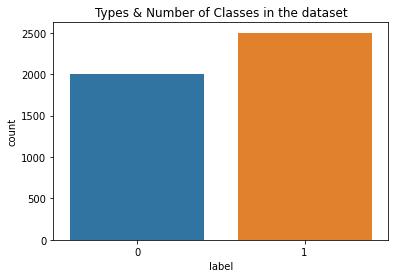

In [ ]:
sns.countplot(x='label',data=df)

plt.title('Types & Number of Classes in the dataset')

In [ ]:

from nltk.corpus import stopwords

stop = stopwords.words('english')

In [ ]:
def most_common_words(sentences, num=10):    
    words = ' '.join(sentences).lower().split()
    words_cleaned = [word for word in words if word not in stop]
    return pd.Series(words_cleaned).value_counts()[:num]

In [ ]:
print('Clickbait')
print(most_common_words(clickbait))


Clickbait
things      994
people      909
know        800
make        760
17          670
21          642
based       607
19          578
actually    577
times       507
dtype: int64


In [ ]:
print('Non-Clickbait')
print(most_common_words(non_clickbait))

Non-Clickbait
new           797
us            598
u.s.          523
dies          341
killed        333
dead          321
president     288
uk            282
kills         277
australian    270
dtype: int64


In [ ]:
df.shape,df_raw.shape,data_irony.shape

((4500, 2), (3000, 2), (3834, 2))

# **Specifying features and labels**

In [ ]:
dfg=pd.concat([data_irony,df],ignore_index=True)
print(dfg.shape)
df_raww=pd.concat([dfg,df_raw],ignore_index=True)

df_raww = df_raww.sample(frac=1).reset_index(drop=True)
print(df_raww.shape)

(8334, 2)
(11334, 2)


In [ ]:

X= df_raww['text']
y=df_raww['label']
X.shape,y.shape

((11334,), (11334,))

In [ ]:
# sample statements
X.head(5).tolist()

['@hoplitnet The fact that Whites are prone to universal thinking is actually racial in and of itself.',
 'Second stone circle found one mile from Stonehenge',
 'Strong earthquake strikes Indonesia',
 'Serbian goal keeper debuts in Croatian football club Rijeka',
 'A judge in Maryland has granted a new trial to Adnan Syed, setting aside his conviction for the 1999 murder of his former girlfriend, in a case that was the subject of the first season of the hit podcast “Serial. ” Mr. Syed’s lawyer, C. Justin Brown, posted the news on Twitter on Thursday afternoon and confirmed by phone that the motion for a new trial had been granted by Judge Martin P. Welch of the Baltimore City Circuit Court. The decision to grant Mr. Syed, 35, a retrial was a major victory for an inmate who has long maintained his innocence and has exhausted all other avenues of appeal. He was convicted in 2000 in the murder of his former girlfriend, Hae Min Lee, and had served 16 years of a life sentence. “Serial” turn

In [ ]:
#sample labels
y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
# specifying train and test split with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

9067 2267
9067 2267


### Custom Pre - Processing and Tokenisation of the data

In [ ]:

""" Regular expression for cleaning the statements"""

hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")
extras_re = re.compile("[.;:!\'?,\"()\[\]]")
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)


""" Preprocessing the text in the statements"""
def preprocess(text):

    p_text = hashtag_re.sub("",text)
    p_text = mention_re.sub("",p_text)
    p_text = extras_re.sub("",p_text)
    p_text = url_re.sub("",p_text)
    p_text = ftfy.fix_text(p_text)
    p_text = emoji_pattern.sub(" ", p_text)
    return p_text.lower()




def Tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    porter_stemmer=nltk.PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    return words



# stop words list set to english
stopwords_list = stopwords.words('english') # stop word list




### Defining custom functions for displaying results of Classification

In [ ]:
# function for results of cross-validation
def print_cv_scores_summary(name, scores):
    print("{}: mean = {:.2f}%, sd = {:.2f}%, min = {:.2f}, max = {:.2f}".format(name, scores.mean()*100, scores.std()*100, scores.min()*100, scores.max()*100))


# fucntion for results of model fitting
def print_scores(predictions):
    print("Accuracy: ", accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    
# function for displaying confusion matrix
def confusion_matrix_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (10, 8)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="BuPu", center=0, fmt='g')
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# function for displaying confusion matrix in percentage terms
def confusion_matrix_percent_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    percents = cmdf.div(cmdf.sum(axis=1), axis=0)*100
    dims = (10, 10)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(percents, annot=True, cmap="PiYG", center=0, vmin=0, vmax=100)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    
#list(df_columns.columns))-list(df_raw['labels'])"coolwarm"'Blues'PiYG'BuPu'

## Creating Pipeline with TFID Vectorizer along with Feature Union of 'total words' in the 'text'


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.field]
class NumberSelector(BaseEstimator, TransformerMixin):
    def __init__(self, field):
        self.field = field
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.field]]

In [ ]:
df_raw_tfid= df_raw.copy()

In [ ]:
df_raw_tfid.head(2)

,text,label
0,President Donald Trump signaled his support fo...,0
1,"Trump and Brexit Defeat Globalism, for Now Any...",1


In [ ]:
header_list=["text","label","TotalWords","Lemmatised_words"]


In [ ]:
df_raw_tfid = df_raw_tfid.reindex(columns = header_list) 
df_raw_tfid.head(2)

,text,label,TotalWords,Lemmatised_words
0,President Donald Trump signaled his support fo...,0,NaN,NaN
1,"Trump and Brexit Defeat Globalism, for Now Any...",1,NaN,NaN


In [ ]:
# creating new column to hold total number of words in the text and calculating the total words
df_raw_tfid['TotalWords'] = df_raw_tfid['text'].str.split().str.len()

In [ ]:
df_raw_tfid.head(2)

,text,label,TotalWords,Lemmatised_words
0,President Donald Trump signaled his support fo...,0,144,NaN
1,"Trump and Brexit Defeat Globalism, for Now Any...",1,1104,NaN


## Lemmatisation of the 'statements' by giving POS (parts of speech) Tags as context

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
"""WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc.
        By default it is set to Noun. Here we consider only POS tags of Noun, Adjective, Verb and Adverb. """

corpus=[]

def lemmatize():

    for state in df_raw_tfid['text']:
    
        texts=preprocess(state)
        token=nltk.word_tokenize(texts)
        corpus.append(token)

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    for index,entry in enumerate(corpus):
        # looping through the entries and saving in the corpus
        Final_words = []
        # fitting WordNetLemmatizer()
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag will provide the 'tag' i.e if the word is Noun(N) or Verb(V) etc.
        for word, tag in pos_tag(entry):
        # condition is to check for Stop words and consider only alphabets
            if word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
        # The processed words for each 'statement' will be store in column 'lemmatised_words in the dataframe'
        df_raw_tfid.loc[index,'Lemmatised_words'] = str(Final_words)

In [ ]:
lemmatize()

In [ ]:
# sample lemmatised text of the 'statements'


In [ ]:
# We can see that new column 'Lemmtised_words is created which stores the lemmatised words of the 'text'
df_raw_tfid.head

<bound method NDFrame.head of                                                    text  ...                                   Lemmatised_words
0     President Donald Trump signaled his support fo...  ...  ['president', 'donald', 'trump', 'signal', 'su...
1     Trump and Brexit Defeat Globalism, for Now Any...  ...  ['trump', 'brexit', 'defeat', 'globalism', 'an...
2     NASA is getting new looks at Jupiter, from clo...  ...  ['nasa', 'get', 'new', 'look', 'jupiter', 'clo...
3     (Before It's News)\nAs advanced as our Job Pos...  ...  ['news', 'advance', 'job', 'post', 'analytics'...
4     In my timeline it was Michael Barage, Rump and...  ...  ['timeline', 'michael', 'barage', 'rump', 'bil...
...                                                 ...  ...                                                ...
2995  ‹ › Arnaldo Rodgers is a trained and educated ...  ...  ['arnaldo', 'rodgers', 'trained', 'educated', ...
2996  .@CLewandowski_: ”I think Jim Comey is in big ...  ...  ['think', 'j

In [ ]:
# X=df_raw_tfid['Lemmatised_words'].tolist()
# y=df_raw_tfid['label']
# # fitting TfidfVectorizer with the lemmatised 'statements'
# Encoder = LabelEncoder()
# y = Encoder.fit_transform(y)

# Tfidf_vect = TfidfVectorizer()
# Tfidf_vect.fit(df_raw_tfid['Lemmatised_words'])
# X = Tfidf_vect.transform(X)

## Converting the Multiclass labels into Binary class labels (Fake & True) and predicting

In [ ]:
bi_class.head(30)

,text,label
0,President Donald Trump signaled his support fo...,True
1,"Trump and Brexit Defeat Globalism, for Now Any...",Fake
2,"NASA is getting new looks at Jupiter, from clo...",True
3,(Before It's News)\nAs advanced as our Job Pos...,Fake
4,"In my timeline it was Michael Barage, Rump and...",Fake
5,"In the tech business, you often invent the pro...",True
6,WASHINGTON — Navy SEALs led an unsuccessful...,True
7,“Be ye therefore perfect . . . even as your Fa...,Fake
8,,Fake
9,Images reveal crashed Schiaparelli Mars lander...,Fake


In [ ]:
df_raw_tfid.head(30)

,text,label,TotalWords,Lemmatised_words
0,President Donald Trump signaled his support fo...,0,144,"['president', 'donald', 'trump', 'signal', 'su..."
1,"Trump and Brexit Defeat Globalism, for Now Any...",1,1104,"['trump', 'brexit', 'defeat', 'globalism', 'an..."
2,"NASA is getting new looks at Jupiter, from clo...",0,286,"['nasa', 'get', 'new', 'look', 'jupiter', 'clo..."
3,(Before It's News)\nAs advanced as our Job Pos...,1,244,"['news', 'advance', 'job', 'post', 'analytics'..."
4,"In my timeline it was Michael Barage, Rump and...",1,45,"['timeline', 'michael', 'barage', 'rump', 'bil..."
5,"In the tech business, you often invent the pro...",0,871,"['tech', 'business', 'often', 'invent', 'produ..."
6,WASHINGTON — Navy SEALs led an unsuccessful...,0,998,"['washington', 'navy', 'seal', 'lead', 'unsucc..."
7,“Be ye therefore perfect . . . even as your Fa...,1,774,"['ye', 'therefore', 'perfect', 'even', 'father..."
8,,1,0,[]
9,Images reveal crashed Schiaparelli Mars lander...,1,319,"['image', 'reveal', 'crash', 'schiaparelli', '..."


In [ ]:
df_raw_tfid["text2"]="null"
df_raw_tfid

,text,label,TotalWords,Lemmatised_words,text2
0,President Donald Trump signaled his support fo...,0,144,"['president', 'donald', 'trump', 'signal', 'su...",null
1,"Trump and Brexit Defeat Globalism, for Now Any...",1,1104,"['trump', 'brexit', 'defeat', 'globalism', 'an...",null
2,"NASA is getting new looks at Jupiter, from clo...",0,286,"['nasa', 'get', 'new', 'look', 'jupiter', 'clo...",null
3,(Before It's News)\nAs advanced as our Job Pos...,1,244,"['news', 'advance', 'job', 'post', 'analytics'...",null
4,"In my timeline it was Michael Barage, Rump and...",1,45,"['timeline', 'michael', 'barage', 'rump', 'bil...",null
...,...,...,...,...,...
2995,‹ › Arnaldo Rodgers is a trained and educated ...,1,268,"['arnaldo', 'rodgers', 'trained', 'educated', ...",null
2996,.@CLewandowski_: ”I think Jim Comey is in big ...,0,198,"['think', 'jim', 'comey', 'big', 'trouble', 'j...",null
2997,The stock market reached yet another new high ...,0,969,"['stock', 'market', 'reach', 'yet', 'another',...",null
2998,"Fastaqim Positions Overrun, Fighters Detained ...",1,207,"['fastaqim', 'position', 'overrun', 'fighter',...",null


In [ ]:
df_raw_tfid["text2"]=df_raw_tfid["text"].replace(to_replace=r"[^A-Za-z0-9\-]", value=r" ", regex=True)



# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df_raw_tfid["text2"] = df_raw_tfid["text2"].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stopwords_list)]))
df_raw_tfid

,text,label,TotalWords,Lemmatised_words,text2
0,President Donald Trump signaled his support fo...,0,144,"['president', 'donald', 'trump', 'signal', 'su...",president donald trump signaled support activi...
1,"Trump and Brexit Defeat Globalism, for Now Any...",1,1104,"['trump', 'brexit', 'defeat', 'globalism', 'an...",trump brexit defeat globalism anyway 14 2016 t...
2,"NASA is getting new looks at Jupiter, from clo...",0,286,"['nasa', 'get', 'new', 'look', 'jupiter', 'clo...",nasa getting new looks jupiter close far away ...
3,(Before It's News)\nAs advanced as our Job Pos...,1,244,"['news', 'advance', 'job', 'post', 'analytics'...",news advanced job posting analytics become inc...
4,"In my timeline it was Michael Barage, Rump and...",1,45,"['timeline', 'michael', 'barage', 'rump', 'bil...",timeline michael barage rump billary mandella ...
...,...,...,...,...,...
2995,‹ › Arnaldo Rodgers is a trained and educated ...,1,268,"['arnaldo', 'rodgers', 'trained', 'educated', ...",arnaldo rodgers trained educated psychologist ...
2996,.@CLewandowski_: ”I think Jim Comey is in big ...,0,198,"['think', 'jim', 'comey', 'big', 'trouble', 'j...",clewandowski think jim comey big trouble jim c...
2997,The stock market reached yet another new high ...,0,969,"['stock', 'market', 'reach', 'yet', 'another',...",stock market reached yet another new high wedn...
2998,"Fastaqim Positions Overrun, Fighters Detained ...",1,207,"['fastaqim', 'position', 'overrun', 'fighter',...",fastaqim positions overrun fighters detained j...


In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
 
    all_words = ' '.join([text for text in text[column_text]])
   

    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

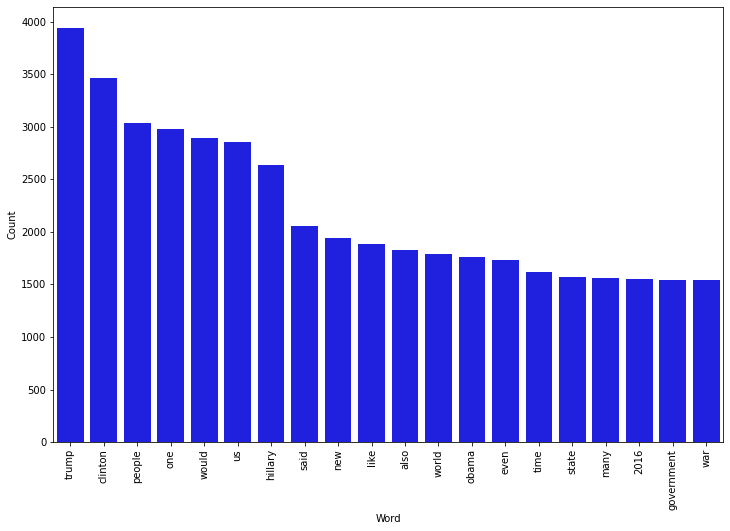

In [ ]:

# Most frequent words in fake news
counter(df_raw_tfid[df_raw_tfid["label"] == 1], "text2", 20)

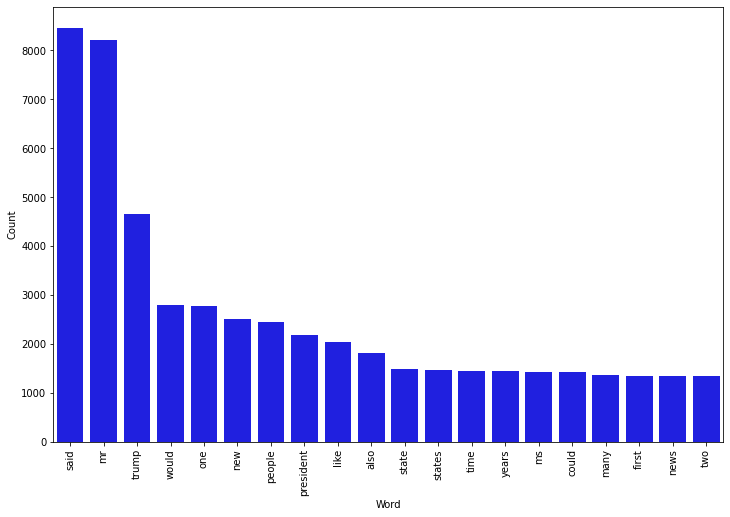

In [ ]:
# Most frequent words in real news
counter(df_raw_tfid[df_raw_tfid["label"] == 0], "text2", 20)

In [ ]:
df_raw_tfid[df_raw_tfid["label"] == 1]

,text,label,TotalWords,Lemmatised_words,text2
1,"Trump and Brexit Defeat Globalism, for Now Any...",1,1104,"['trump', 'brexit', 'defeat', 'globalism', 'an...",trump brexit defeat globalism anyway 14 2016 t...
3,(Before It's News)\nAs advanced as our Job Pos...,1,244,"['news', 'advance', 'job', 'post', 'analytics'...",news advanced job posting analytics become inc...
4,"In my timeline it was Michael Barage, Rump and...",1,45,"['timeline', 'michael', 'barage', 'rump', 'bil...",timeline michael barage rump billary mandella ...
7,“Be ye therefore perfect . . . even as your Fa...,1,774,"['ye', 'therefore', 'perfect', 'even', 'father...",ye therefore perfect even father heaven perfec...
8,,1,0,[],
...,...,...,...,...,...
2993,Короткая ссылка 25 Совет РАН по космосу утвер...,1,148,"['короткая', 'ссылка', 'совет', 'ран', 'по', '...",25 - 10 - - 2 5 1 5 2013
2994,"By Lance Schuttler\nOn November 8th, 2016, hun...",1,669,"['lance', 'schuttler', 'november', 'hundred', ...",lance schuttler november 8th 2016 hundreds pos...
2995,‹ › Arnaldo Rodgers is a trained and educated ...,1,268,"['arnaldo', 'rodgers', 'trained', 'educated', ...",arnaldo rodgers trained educated psychologist ...
2998,"Fastaqim Positions Overrun, Fighters Detained ...",1,207,"['fastaqim', 'position', 'overrun', 'fighter',...",fastaqim positions overrun fighters detained j...


In [ ]:
bi_class['TotalWords'] = bi_class['text'].str.split().str.len()

In [ ]:
X = df_raw_tfid[['Lemmatised_words', 'TotalWords','text']]

Y= df_raw_tfid['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
X_train.head()

,Lemmatised_words,TotalWords,text
1733,"['washington', 'kellyanne', 'conway', 'counsel...",431,"WASHINGTON — Kellyanne Conway, counselor to..."
2078,"['headline', 'news', 'report', 'flood', 'accou...",568,Headlines and news reports have been flooded w...
2132,"['jane', 'bailey', 'jane', 'bailey', 'author',...",1381,Jane Bailey Jane Bailey is a self-published au...
1923,"['obama', 'secret', 'muslim', 'list', 'enemy',...",1170,Obama’s Secret Muslim List Why enemies of Isra...
1913,"['woman', 'trend', 'guess', 'suddenly', 'seem'...",804,Are women trending? I guess they are! Suddenly...


In [ ]:
y_train.head()

1733    0
2078    1
2132    1
1923    1
1913    0
Name: label, dtype: int64

In [ ]:

classifier_biclass = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('colext', TextSelector('text')),
            ('tfidf', TfidfVectorizer(analyzer='word',preprocessor=preprocess, tokenizer=Tokenizer, stop_words=stopwords_list,
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
                       ('svd', TruncatedSVD(algorithm='randomized', n_components=300)),
            
        ])),
        ('words', Pipeline([
            ('wordext', NumberSelector('TotalWords')),
            ('wscaler', StandardScaler()),
        ])),
    ])),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
    ])

In [ ]:
a=classifier_biclass.fit(X_train, y_train)
a_predictions = a.predict(X_test)


print_scores(a_predictions)

Accuracy:  0.916
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       305
           1       0.91      0.95      0.93       445

    accuracy                           0.92       750
   macro avg       0.92      0.91      0.91       750
weighted avg       0.92      0.92      0.92       750

[[263  42]
 [ 21 424]]


In [ ]:
score3=accuracy_score(y_test,a_predictions)
LRS=round(score3*100,2)
print(f'Accuracy: {LRS}%')

Accuracy: 91.6%


In [ ]:
X_test.head()

,Lemmatised_words,TotalWords,text
1274,"['november', 'nuclear', 'weapon', 'foreign', '...",203,"November 11, 2016 Nuclear weapons: how foreign..."
1933,"['great', 'wall', 'con', 'job', 'part', 'recov...",280,The Great Wall Street/Washington Con Job: Part...
954,"['photo', 'u', 'army', 'cc', 'list', 'notewort...",2034,Photo by The U.S. Army | CC BY 2.0 \n\nHere is...
620,"['comment', 'megyn', 'kelly', 'seem', 'think',...",842,0 comments \nMegyn Kelly seems to think that s...
936,"['videos', 'police', 'department', 'refuse', '...",1163,Videos Police Departments Refuse Participation...


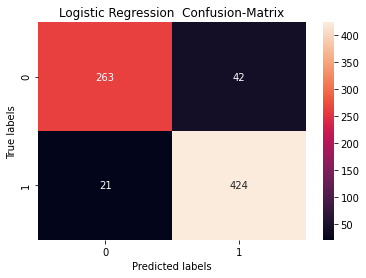

In [ ]:
matrix=confusion_matrix(y_test, a_predictions) # getting the results of confusion matrix from the classification.
sns.heatmap(matrix, annot = True,fmt='g')       # printing the matrix
plt.title('Logistic Regression  Confusion-Matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels');

In [ ]:
classifier_biclass.set_params(clf=GaussianNB())
b=classifier_biclass.fit(X_train, y_train)
b_predictions = b.predict(X_test)
print_scores(b_predictions)

Accuracy:  0.6053333333333333
              precision    recall  f1-score   support

           0       0.51      0.97      0.67       305
           1       0.95      0.36      0.52       445

    accuracy                           0.61       750
   macro avg       0.73      0.66      0.59       750
weighted avg       0.77      0.61      0.58       750

[[296   9]
 [287 158]]


In [ ]:
score3=accuracy_score(y_test,b_predictions)
GNB=round(score3*100,2)
print(f'Accuracy: {GNB}%')

Accuracy: 60.53%


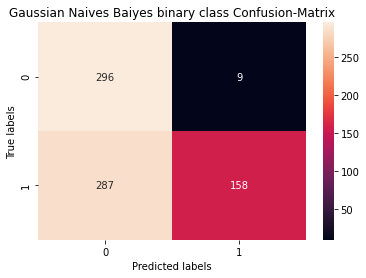

In [ ]:
matrix=confusion_matrix(y_test, b_predictions) # getting the results of confusion matrix from the classification.
sns.heatmap(matrix, annot = True,fmt='g')       # printing the matrix
plt.title('Gaussian Naives Baiyes binary class Confusion-Matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels');

In [ ]:
classifier_biclass.set_params(clf=svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True))
c=classifier_biclass.fit(X_train, y_train)
c_predictions = c.predict(X_test)

print_scores(c_predictions)

Accuracy:  0.9226666666666666
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       305
           1       0.93      0.94      0.93       445

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750

[[275  30]
 [ 28 417]]


In [ ]:
score3=accuracy_score(y_test,c_predictions)
SVM=round(score3*100,2)
print(f'Accuracy: {SVM}%')

Accuracy: 92.27%


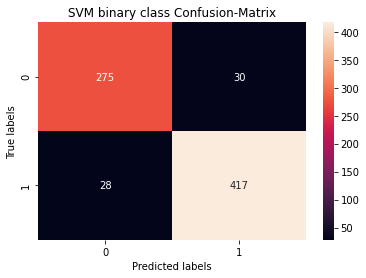

In [ ]:
matrix=confusion_matrix(y_test, c_predictions) # getting the results of confusion matrix from the classification.
sns.heatmap(matrix, annot = True,fmt='g')       # printing the matrix
plt.title('SVM binary class Confusion-Matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels');

In [ ]:
labels={'LogisticRegressorClassifier':LRS,'GaussianNBClassifier':GNB,'SVM':SVM}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

LogisticRegressorClassifier : 91.6
GaussianNBClassifier : 60.53
SVM : 92.27


<BarContainer object of 3 artists>

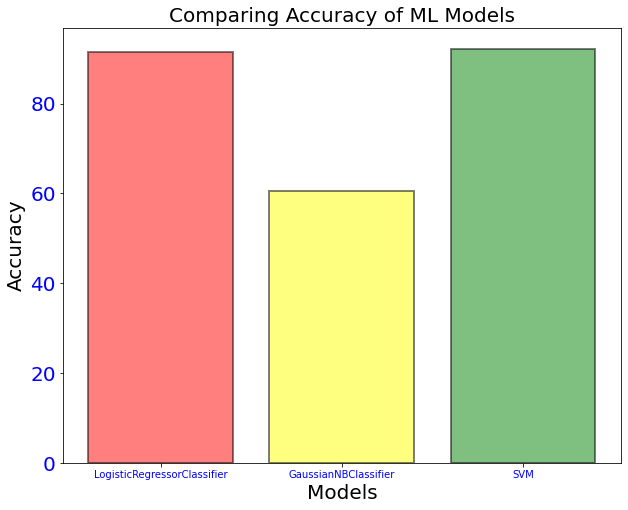

In [ ]:
plt.figure(figsize=(10,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','green']
plt.xticks(fontsize=10,color='blue')
plt.yticks(fontsize=20,color='blue')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

In [ ]:

def plot_roc_multi(X_test, y_true, models,save=False):
    plt.figure(figsize=(10,6))
    for name, model in models.items():
        
           
        
        
        proba = model.predict_proba(X_test)[:, 1]
        prediction =  model.predict(X_test)
        fpr, tpr, thresh = metrics.roc_curve(y_true, proba)
        accuracy = accuracy_score(y_true, prediction)
            # roc_auc = auc(fpr, tpr)
        label = "%s - Accuracy %0.2f" % (name, accuracy)
        plt.plot(fpr, tpr, label=label)
        

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx)

    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curves")
    plt.legend()
    if save:
        plt.savefig('ROC_Curve')

In [ ]:
from sklearn import metrics

In [ ]:
classifier_grid = Pipeline([
    ('features', FeatureUnion([
        ('text', Pipeline([
            ('colext', TextSelector('text')),
            ('tfidf', TfidfVectorizer(analyzer='char_wb', preprocessor=preprocess, tokenizer=Tokenizer, stop_words='english',
                     min_df=.0025, max_df=0.25, ngram_range=(1,3))),
            ('svd', TruncatedSVD(algorithm='randomized', n_components=300)), #for XGB
        ])),
        ('words', Pipeline([
            ('wordext', NumberSelector('TotalWords')),
            ('wscaler', StandardScaler()),
        ])),
    ])),
    ('clf',None),
    ])
    
param_grid={
   # 'selector__k': [100, 50,150],
    'clf': [LogisticRegression(solver='liblinear', random_state=0),
    svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True),GaussianNB() ],
}


In [ ]:
X_test

,Lemmatised_words,TotalWords,text
1274,"['november', 'nuclear', 'weapon', 'foreign', '...",203,"November 11, 2016 Nuclear weapons: how foreign..."
1933,"['great', 'wall', 'con', 'job', 'part', 'recov...",280,The Great Wall Street/Washington Con Job: Part...
954,"['photo', 'u', 'army', 'cc', 'list', 'notewort...",2034,Photo by The U.S. Army | CC BY 2.0 \n\nHere is...
620,"['comment', 'megyn', 'kelly', 'seem', 'think',...",842,0 comments \nMegyn Kelly seems to think that s...
936,"['videos', 'police', 'department', 'refuse', '...",1163,Videos Police Departments Refuse Participation...
...,...,...,...
856,"['clinton', 'campaign', 'stun', 'fbi', 'report...",345,Clinton Campaign STUNNED As FBI Reportedly Reo...
2250,"['print', 'marco', 'rubio', 'patrick', 'murphy...",160,Print \nAs Marco Rubio and Patrick Murphy squa...
852,"['emma', 'morano', 'last', 'surviving', 'perso...",371,"Emma Morano, the last surviving person hailing..."
1663,"['tweet', 'widget', 'b', 'bar', 'editor', 'sen...",1059,Tweet Widget b y BAR editor and senior columni...


In [ ]:
search = GridSearchCV(classifier_grid, cv = StratifiedKFold(n_splits=5, random_state=0,shuffle=True), 
                      return_train_score = False, 
                      scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                      refit = 'f1_weighted',
                      param_grid = param_grid)

search.fit(X_train, y_train)
 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('text',
                                                                        Pipeline(memory=None,
                                                                                 steps=[('colext',
                                                                                         TextSelector(field='text')),
                                                                                        ('tfidf',
                                                                                         TfidfVectorizer(analyzer='char_wb',
                                                                                                         binary=False,

In [ ]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,split4_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,split4_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,30.328162,0.455250,7.755028,0.619877,"LogisticRegression(C=1.0, class_weight=None, d...","{'clf': LogisticRegression(C=1.0, class_weight...",0.942222,0.951111,0.933333,0.944444,0.940000,0.942222,0.005795,2,0.942814,0.951768,0.933299,0.945214,0.940064,0.942632,0.006064,2,0.942222,0.951111,0.933333,0.944444,0.940000,0.942222,0.005795,2,0.942042,0.950959,0.933297,0.944251,0.939914,0.942092,0.005751,2
1,34.341699,0.505246,7.963194,0.614107,"SVC(C=1.0, break_ties=False, cache_size=200, c...","{'clf': SVC(C=1.0, break_ties=False, cache_siz...",0.940000,0.960000,0.944444,0.948889,0.948889,0.948444,0.006652,1,0.939986,0.960722,0.944424,0.948981,0.948924,0.948607,0.006911,1,0.940000,0.960000,0.944444,0.948889,0.948889,0.948444,0.006652,1,0.939950,0.959875,0.944430,0.948816,0.948902,0.948395,0.006622,1
2,30.568783,0.506116,7.926197,0.640950,"GaussianNB(priors=None, var_smoothing=1e-09)","{'clf': GaussianNB(priors=None, var_smoothing=...",0.848889,0.844444,0.777778,0.873333,0.848889,0.838667,0.032099,3,0.848759,0.851121,0.789038,0.874948,0.857422,0.844258,0.029092,3,0.848889,0.844444,0.777778,0.873333,0.848889,0.838667,0.032099,3,0.848807,0.844965,0.771127,0.873618,0.849383,0.837580,0.034741,3


Accuracy:  0.9533333333333334
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       305
           1       0.97      0.95      0.96       445

    accuracy                           0.95       750
   macro avg       0.95      0.96      0.95       750
weighted avg       0.95      0.95      0.95       750

[[294  11]
 [ 24 421]]


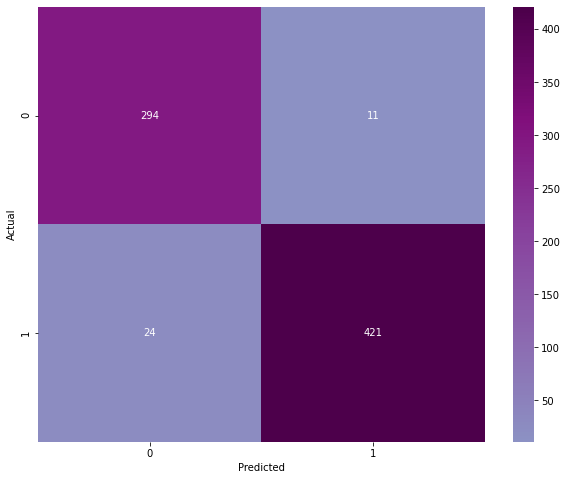

In [ ]:
predictions = search.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

confusion_matrix_heatmap(confusion_matrix(y_test,predictions), search.classes_)

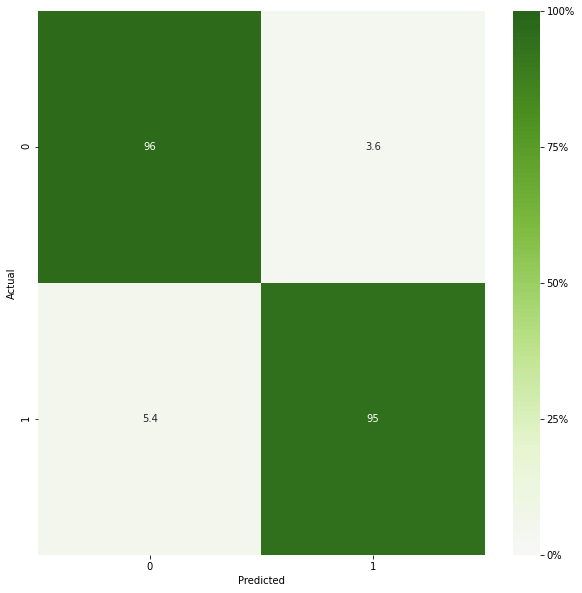

In [ ]:
confusion_matrix_percent_heatmap(confusion_matrix(y_test,predictions), search.classes_)

In [ ]:
print(search.best_estimator_ )

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text',
                                                 Pipeline(memory=None,
                                                          steps=[('colext',
                                                                  TextSelector(field='text')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(analyzer='char_wb',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
                

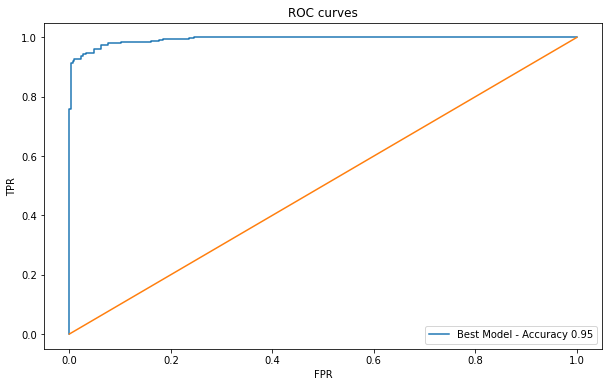

In [ ]:
models = {
    "Best Model": search.best_estimator_ 
}

plot_roc_multi(X_test, y_test, models, save=True)

In [ ]:
search.best_score_

0.9483945881641912

In [ ]:
print(search.best_params_) 


{'clf': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)}


In [ ]:
print(search.scorer_)

{'accuracy': make_scorer(accuracy_score), 'precision_weighted': make_scorer(precision_score, pos_label=None, average=weighted), 'recall_weighted': make_scorer(recall_score, pos_label=None, average=weighted), 'f1_weighted': make_scorer(f1_score, pos_label=None, average=weighted)}


In [ ]:
    def predict_proba(self, X):
        """
        Return probability estimates for the test vector X.
        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
        Returns
        -------
        C : array-like of shape (n_samples, n_classes)
            Returns the probability of the samples for each class in
            the model. The columns correspond to the classes in sorted
            order, as they appear in the attribute :term:`classes_`.
        """
        return np.exp(self.predict_log_proba(X))

In [ ]:
x=predict_proba(search.best_estimator_ , X_test)
x

array([[2.00671738e-02, 9.79932826e-01],
       [2.26149391e-09, 9.99999998e-01],
       [1.86845684e-07, 9.99999813e-01],
       ...,
       [7.20244826e-01, 2.79755174e-01],
       [2.84609631e-06, 9.99997154e-01],
       [9.59035818e-01, 4.09641818e-02]])

In [ ]:
x[0,0]+x[0,1]

0.9999999999999999

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls /content/gdrive/My Drive

ls: cannot access '/content/gdrive/My': No such file or directory
ls: cannot access 'Drive': No such file or directory


In [ ]:
pip install torch

In [ ]:

path = "/content/gdrive/My Drive/collab/fnd.pkl" 


In [ ]:
import joblib
joblib.dump(search.best_estimator_,"fnd.pkl")
joblib.dump(search.best_estimator_, path, compress = 1)

['/content/gdrive/My Drive/collab/fnd.pkl']

In [ ]:
loaded_model = joblib.load(path)
result = loaded_model.predict(X_test)
print(result)

[1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0
 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1
 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 1 1 1 0 0 1 1 0 1 0 0 0 

In [ ]:
a=loaded_model.predict_proba(X_test)
a

array([[2.00671738e-02, 9.79932826e-01],
       [2.26149391e-09, 9.99999998e-01],
       [1.86845684e-07, 9.99999813e-01],
       ...,
       [7.20244826e-01, 2.79755174e-01],
       [2.84609631e-06, 9.99997154e-01],
       [9.59035818e-01, 4.09641818e-02]])

In [ ]:
y_test

1274    1
1933    1
954     1
620     1
936     1
       ..
856     1
2250    1
852     0
1663    1
1925    0
Name: label, Length: 750, dtype: int64

In [ ]:
y_train

1733    0
2078    1
2132    1
1923    1
1913    0
       ..
1329    0
726     1
1307    0
235     0
1088    0
Name: label, Length: 2250, dtype: int64